# Capstone project: predict Rossmann's store sales

## Manuel Freude, May 2018

## Sales prediction code

Report and library sheets will be provided separately

In [69]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

data = pd.read_csv('cleaned_dataset.csv')
data.drop(columns=['Unnamed: 0'] , inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 46 columns):
Store_ID                     1017209 non-null int64
Customers                    1017209 non-null int64
Sales                        1017209 non-null int64
Open                         1017209 non-null int64
H_None                       1017209 non-null int64
H_Public                     1017209 non-null int64
H_Easter                     1017209 non-null int64
H_X-Mas                      1017209 non-null int64
SchoolHoliday                1017209 non-null int64
Type_A                       1017209 non-null int64
Type_B                       1017209 non-null int64
Type_C                       1017209 non-null int64
Type_D                       1017209 non-null int64
Asort_Basic                  1017209 non-null int64
Asort_Extra                  1017209 non-null int64
Asort_Extended               1017209 non-null int64
Promo1                       1017209 non-null int64
Pro

In [70]:
data.head()

,Store_ID,Customers,Sales,Open,H_None,H_Public,H_Easter,H_X-Mas,SchoolHoliday,Type_A,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,555,5263,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,546,5020,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,523,4782,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1,560,5011,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,612,6102,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


There are many dummy variables in the dataset, but also numerical ones. For the numerical ones, I need to check if they are rather normally distributed so that they fit the regression approach. I will do this with the following ones: 
- Customers
- Sales
- DayOfMonth
- DayOfWeek
- Month
- Year

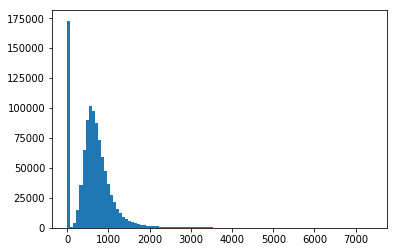

In [71]:
# plotting customers

plt.pyplot.hist(data['Customers'], bins=100);

In [72]:
# checkig on the lower outlier

# source: https://stackoverflow.com/questions/35364601/group-by-and-find-top-n-value-counts-pandas

data['Customers'].value_counts().nlargest(5)

0      172869
560      2414
576      2363
603      2337
571      2330
Name: Customers, dtype: int64

This looks rather normally distributed. There are abnormalities where the customer number is zero. This might either indicated that the shop was not visited at all that day or it was a holiday etc., in that case I would expect the sales numbers to also be zero in many cases. 

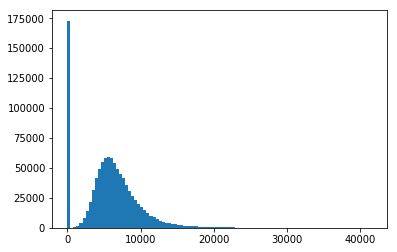

In [73]:
# plotting sales

plt.pyplot.hist(data['Sales'], bins=100);

In [74]:
# checkig on the lower outlier

data['Sales'].value_counts().nlargest(5)

0       172871
5674       215
5558       197
5483       196
6049       195
Name: Sales, dtype: int64

Similar to customers, the data looks rather normally distributed except for the zero. The number of zeros is very high and almost the same as for the customers number. It might make sense to later on take a subset of the data to exclude the zeros and check how the regressions perform. The holidays will loose their relevancy in that case.

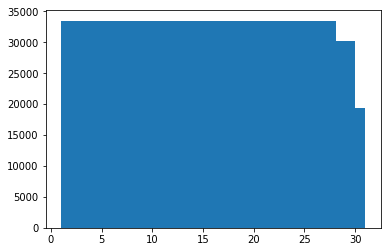

In [79]:
# plotting day of month

plt.pyplot.hist(data['DayOfMonth'], bins=31);

Days of month look well-distributed. I was testing if there are any ones really low, but that's not the case. After 28, they decrease due to February usually not having more than 28 days and many months not having 31 days.

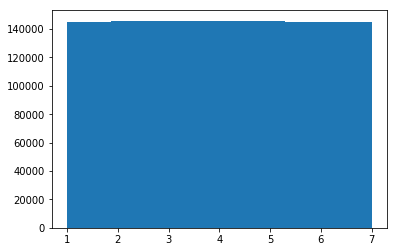

In [83]:
# plotting day of week

plt.pyplot.hist(data['DayOfWeek'], bins=7);

In [84]:
# checking some numbers

data['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

Sundays are also included, might be days with low sales because shops would be closed most of the time.

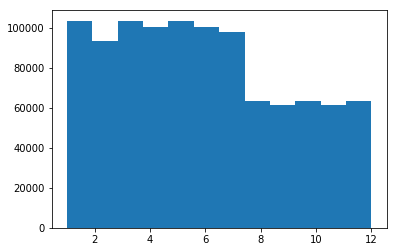

In [85]:
# plotting month

plt.pyplot.hist(data['Month'], bins=12);

In [86]:
# checking some numbers

data['Month'].value_counts()

5     103695
3     103695
1     103694
6     100350
4     100350
7      98115
2      93660
12     63550
10     63550
8      63550
11     61500
9      61500
Name: Month, dtype: int64

All months are included. The second half of the year a little less, due to the structure of the provided data, which is not covering full years 2013 through 2015.

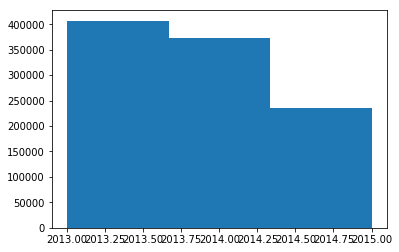

In [88]:
# plotting year

plt.pyplot.hist(data['Year'], bins=3);

In [89]:
# checking some numbers

data['Year'].value_counts()

2013    406974
2014    373855
2015    236380
Name: Year, dtype: int64

Here we can see that we have less data for 2015, as guessed above. So overall, the data looks good for analysis. Next step is to split the dataset into train, test and true set. 